In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import datasets, linear_model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error, r2_score
import zipfile

In [2]:
with zipfile.ZipFile(r"C:\Users\abrah\OneDrive\Documentos\Documentos\Pokemon.zip", 'r') as zip_ref:
    zip_ref.extract("Pokemon.csv", path='temp')

df = pd.read_csv(f'temp/{"Pokemon.csv"}')

This code displays all the column names and their datatypes.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1072 entries, 0 to 1071
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   number      1072 non-null   int64 
 1   name        1072 non-null   object
 2   type1       1072 non-null   object
 3   type2       574 non-null    object
 4   total       1072 non-null   int64 
 5   hp          1072 non-null   int64 
 6   attack      1072 non-null   int64 
 7   defense     1072 non-null   int64 
 8   sp_attack   1072 non-null   int64 
 9   sp_defense  1072 non-null   int64 
 10  speed       1072 non-null   int64 
 11  generation  1072 non-null   int64 
 12  legendary   1072 non-null   bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 101.7+ KB


This code fills all missing cells in the "type2" column and replaces them with "No second type." It then returns the first 10 rows to show this change in effect.

In [4]:
df['type2']=df['type2'].fillna('No Second Type')
df.loc[:10]

,number,name,type1,type2,total,hp,attack,defense,sp_attack,sp_defense,speed,generation,legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,Mega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,3,Gigantamax Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
5,4,Charmander,Fire,No Second Type,309,39,52,43,60,50,65,1,False
6,5,Charmeleon,Fire,No Second Type,405,58,64,58,80,65,80,1,False
7,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
8,6,Mega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
9,6,Mega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False


This code checks uses the nunique method to count the number of unique pokemon in the dataset. It then compares this number to the number of rows in the dataset and since this returns "True" we know that the dataset contains no duplicates.

In [5]:
len_df = len(df)
num_unique = df['name'].nunique()
print(num_unique == len_df)

True


This code checks whether to see if any columns have null values by using the .isna() and .any() method and then converts those corresponding columns into a list. Since the list that is returned is empty we can assume that none of the columns contain null values.

In [6]:
df.columns[df.isna().any()].tolist()

[]

This code will display which pokemon has the highest hp, attack, defense, and speed by using the .idxmax() method to find the index of maximum value and then .loc to find the name associated with that index.

In [7]:
print("Highest hp: " + str(df.loc[df['hp'].idxmax(), 'name']))
print("Highest attack: " + str(df.loc[df['attack'].idxmax(), 'name']))
print("Highest defense: " + str(df.loc[df['defense'].idxmax(), 'name']))
print("Highest speed: " + str(df.loc[df['speed'].idxmax(), 'name']))

Highest hp: Blissey
Highest attack: Mega Mewtwo X
Highest defense: Eternamax Eternatus
Highest speed: Regieleki


This code creates a bar plot with the x axis being all the different pokemon types and the y axis being the counts for all the different types.

<BarContainer object of 20 artists>

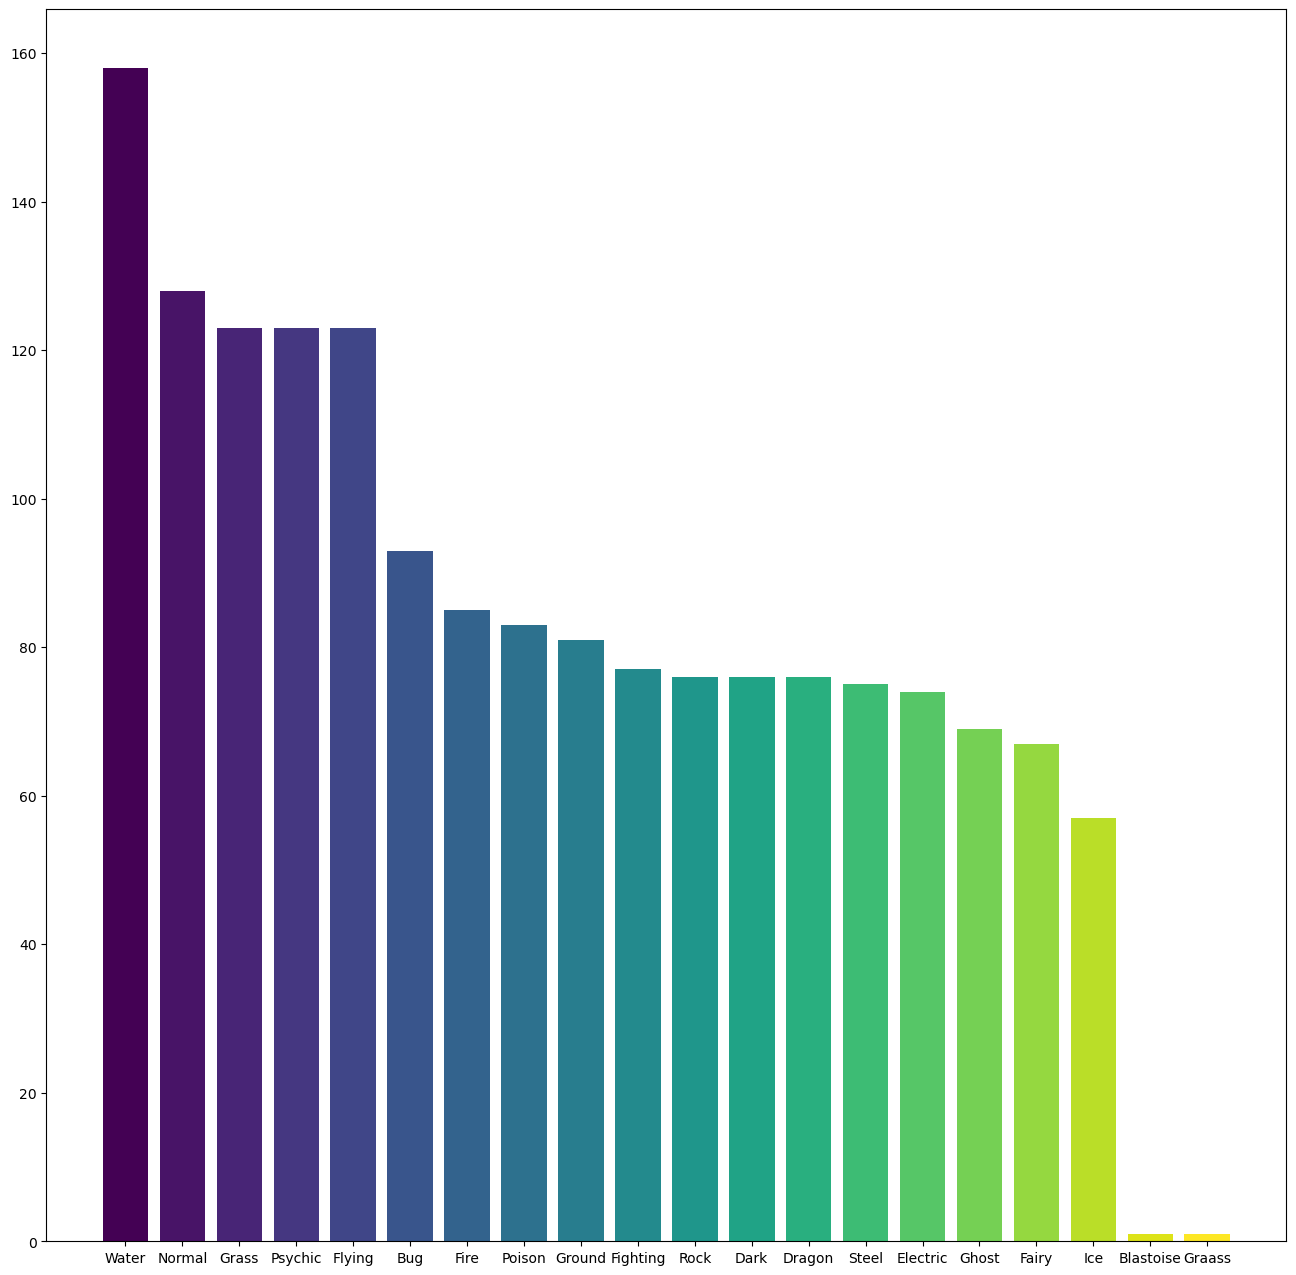

In [8]:
types = df[['type1', 'type2']].stack().value_counts().index.tolist()
types.remove('No Second Type')
type_count = []
for i in types:
    type_count.append(df['type1'].value_counts().get(i,0) + df['type2'].value_counts().get(i,0))

plt.figure(figsize=(16, 16))
plt.bar(types, type_count, color = plt.cm.viridis(np.linspace(0, 1, len(types))))

This code creates a scatter plot showing the relationship between attack and defense and generates a correlation coefficient. In this case there is a correlation coefficient of 0.46 meaning that there is a relationship but it is not very strong.

The correlation coefficient is: 0.46060323862634805


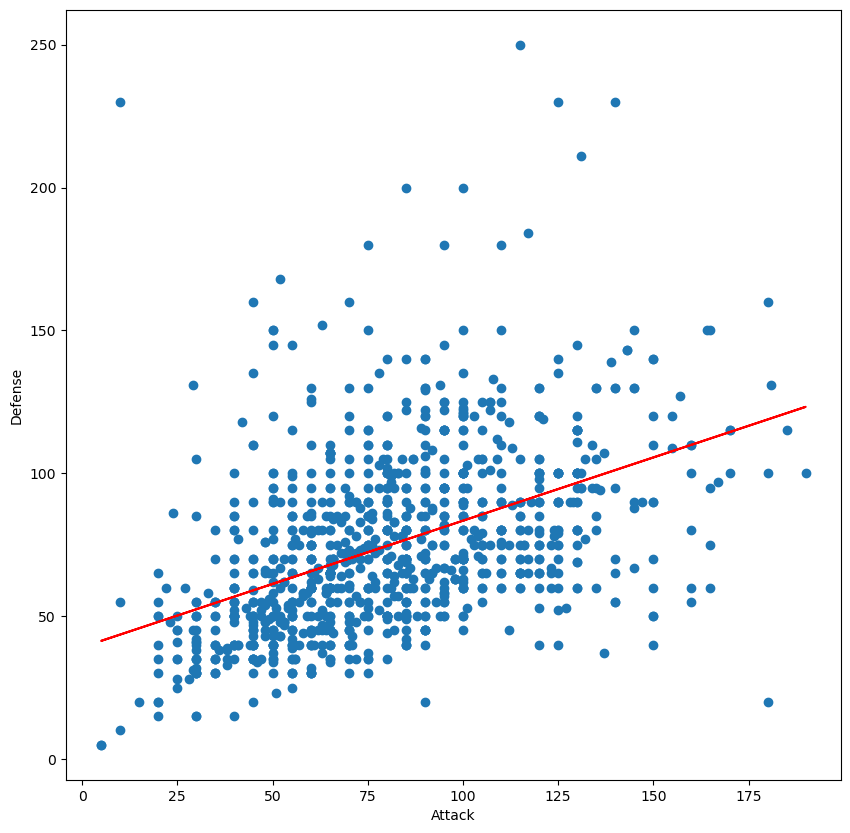

In [9]:
x = df['attack']
y = df['defense']

coefficients = np.polyfit(x, y, 1)
poly = np.poly1d(coefficients)
trend_line = poly(x)

plt.figure(figsize=(10,10))
plt.scatter(x = x, y = y)

plt.plot(x, trend_line, color = 'red', label = 'Trend line')

plt.xlabel("Attack")
plt.ylabel("Defense")

print("The correlation coefficient is: " + str(x.corr(y)))

This code creates a box plot of attack and defense.

Text(0.5, 1.0, 'Box Plot of Attack and Defense')

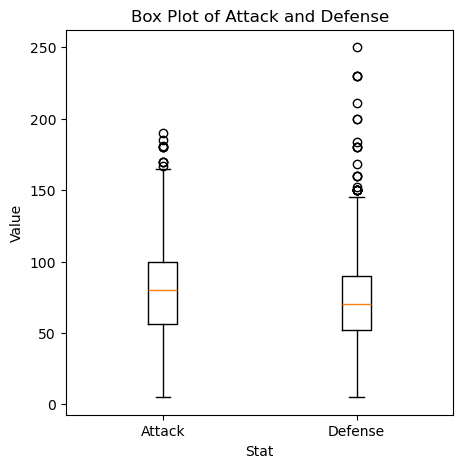

In [10]:
plt.figure(figsize = (5,5))
plt.boxplot([df['attack'],df['defense']], labels=['Attack', 'Defense'])

plt.xlabel('Stat')
plt.ylabel('Value')
plt.title('Box Plot of Attack and Defense')

This code creates a pie chart displaying the proportion of non-legendary to legendary pokemon

Text(0.5, 1.0, 'Legendary vs Non-legendary')

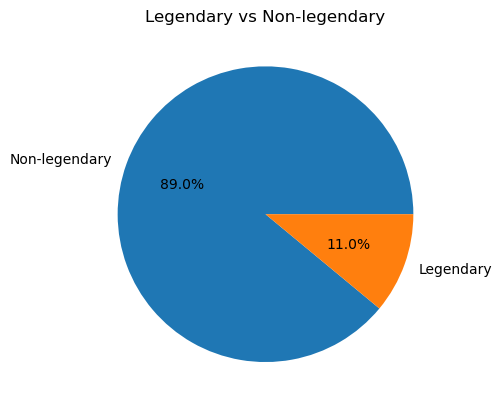

In [11]:
counts = df['legendary'].value_counts().tolist()
labels = ["Non-legendary", "Legendary"]
plt.pie(counts, labels = labels, autopct='%1.1f%%')
plt.title("Legendary vs Non-legendary")

This code creates a correlation matrix of all numerical columns from this dataset.

<Axes: >

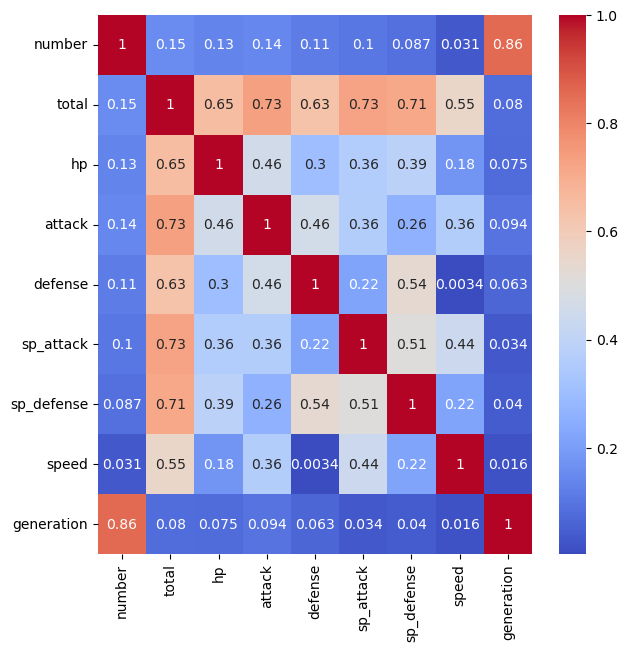

In [12]:
numerical_df = df.select_dtypes(include=['number'])
correlation_matrix = numerical_df.corr()

plt.figure(figsize = (7,7))
sns.heatmap(correlation_matrix, annot = True, cmap='coolwarm')

This code generates a feature extraction with type1 as the target.

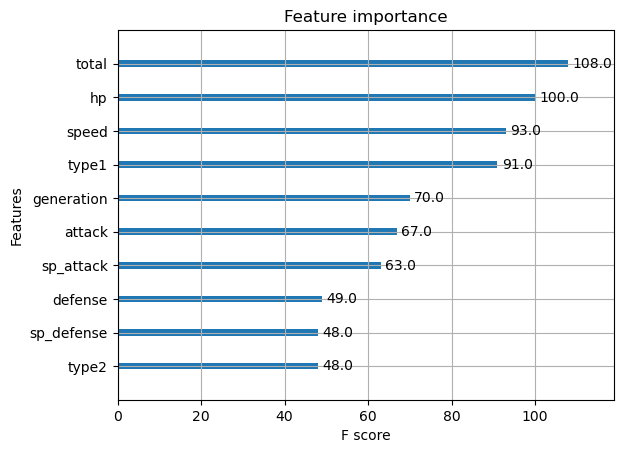

In [13]:
pokemon = df.copy()
pokemon = pokemon.drop(columns=['number', 'name'])

label_encoder = LabelEncoder()
for feature in ['type1', 'type2', 'legendary']:
    pokemon[feature] = label_encoder.fit_transform(pokemon[feature])
    
x = pokemon.drop(columns=['legendary'])
y = pokemon['legendary']

model = xgb.XGBClassifier()
model.fit(x,y)

xgb.plot_importance(model)
plt.show()

This code trains a linear regression model to predict whether the pokemon will be legendary or not. However this model is not the best for this task as I got 20% confidence.

Coefficients: 
 [0.00113721 0.00206453 0.00125123 0.0009037  0.00140467 0.00142485]
Mean squared error: 0.08
Coefficient of determination: 0.22


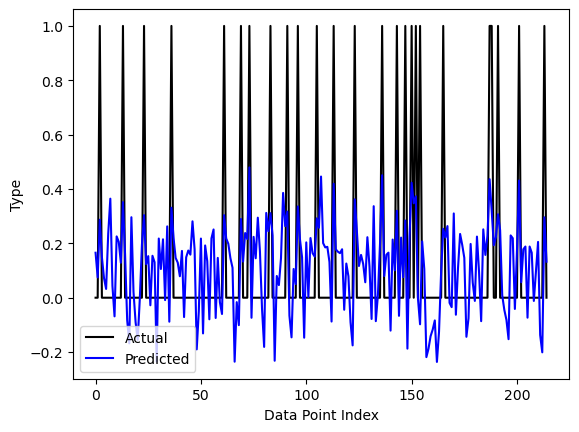

In [70]:
X = pokemon.loc[:, ['hp', 'speed', 'attack', 'defense', 'sp_attack', 'sp_defense']]
Y = pokemon['legendary']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)

y_pred = regr.predict(x_test)
print("Coefficients: \n", regr.coef_)
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

plt.plot(range(len(y_test)), y_test, color='black', label='Actual')
plt.plot(range(len(y_test)), y_pred, color='blue', label='Predicted')
plt.xlabel('Data Point Index')
plt.ylabel('Type')
plt.legend()
plt.show()

This code creates a heatmap of all the columns of the dataset after removing 'name', 'number', and 'type2'.

<Axes: >

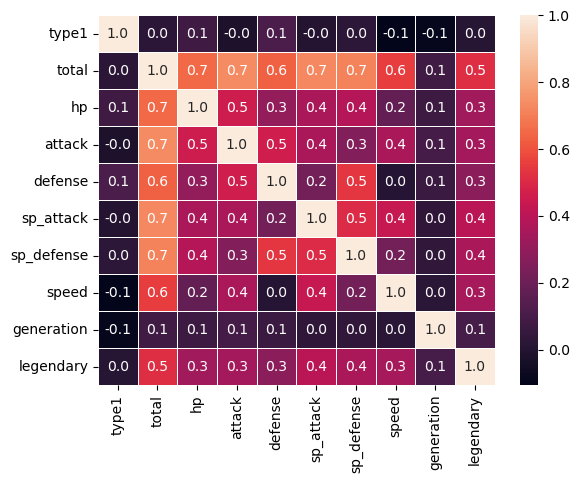

In [68]:
pokemon2 = df.copy()
pokemon2 = pokemon2.drop(columns = 'type2', axis=1)

pokemon2.loc[pokemon2['type1'] == 'Graass', 'type1'] = 'Grass'

label_encoder = LabelEncoder()
for feature in ['type1']:
    pokemon2[feature] = label_encoder.fit_transform(pokemon[feature])

pokemon2_fix = pokemon2[['type1', 'total', 'hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed', 'generation', 'legendary']]

sns.heatmap(pokemon2_fix.corr(), annot = True, linewidth=.5, fmt='.1f')

This code creates a grid of scatter plots showing the relationship between total and each of the individual stats.

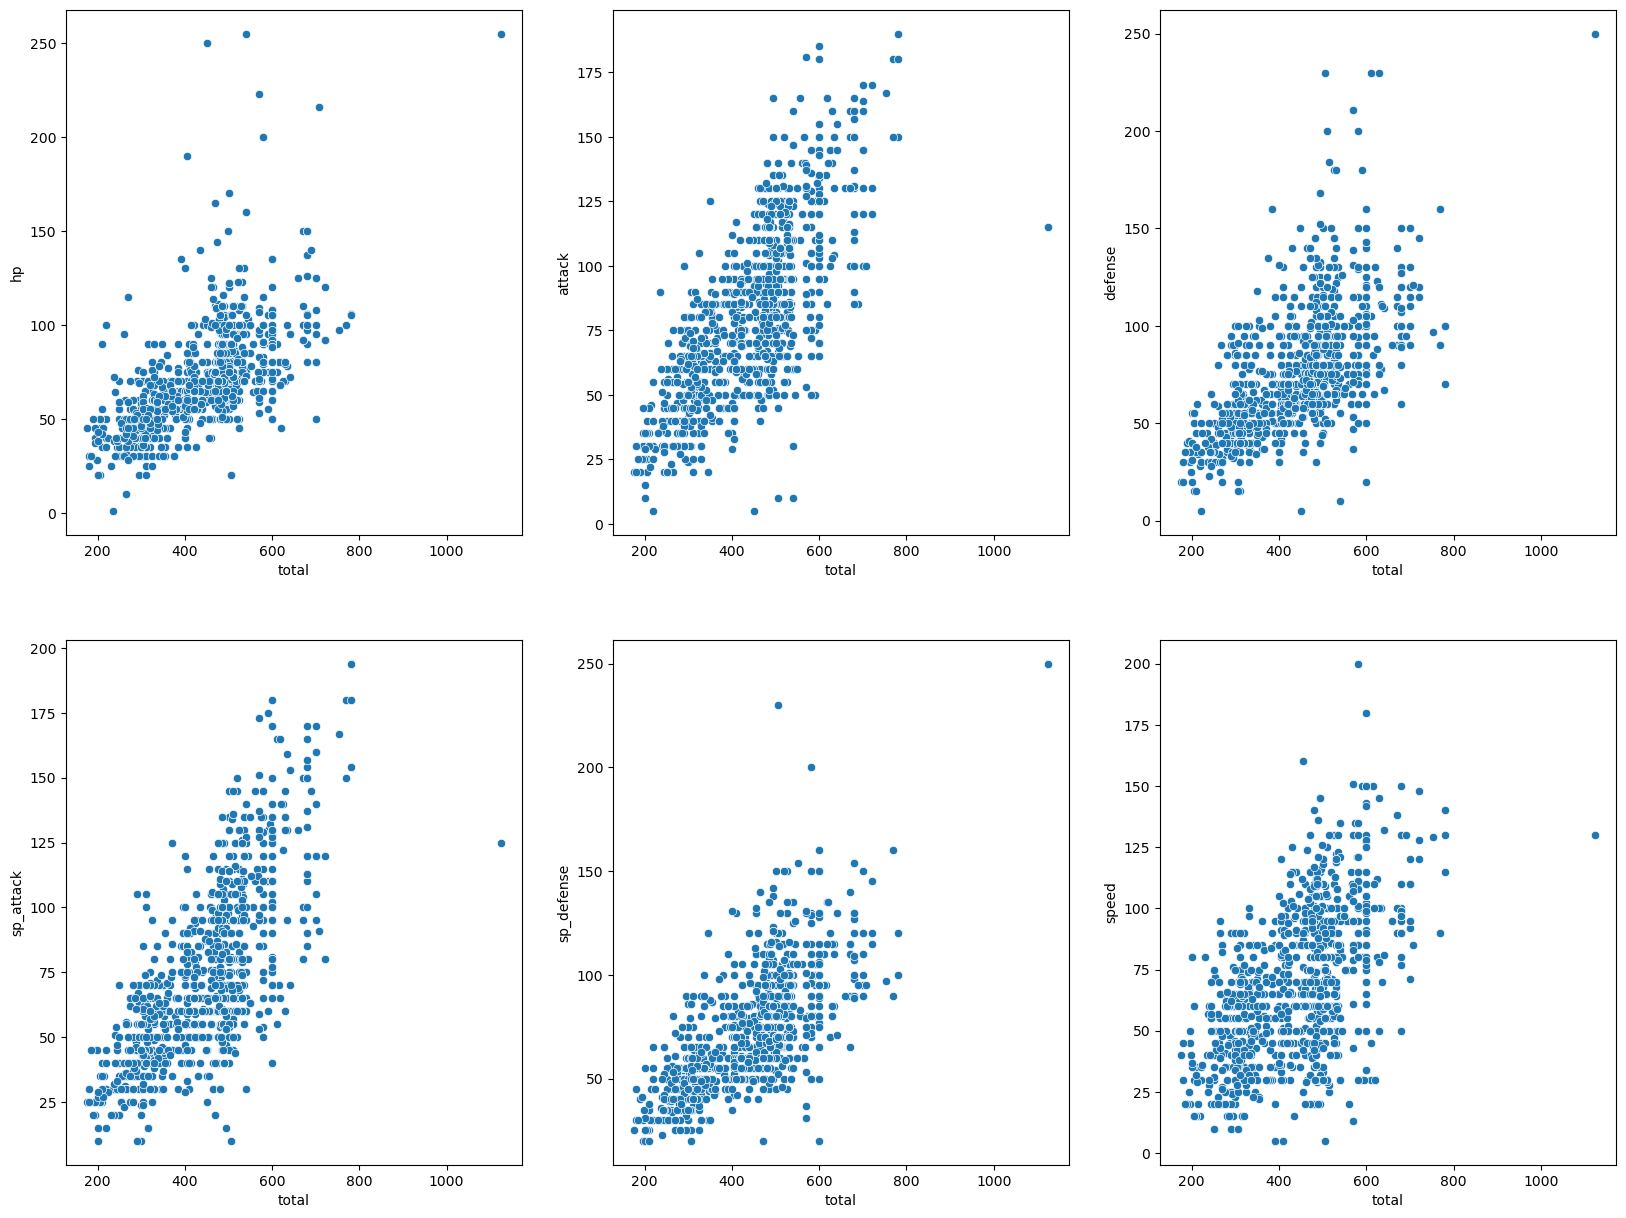

In [30]:
plt.figure(figsize=(20,15))

plt.subplot(2,3,1)
sns.scatterplot(data=pokemon2_fix, x='total', y='hp')

plt.subplot(2,3,2)
sns.scatterplot(data=pokemon2_fix, x='total', y='attack')

plt.subplot(2,3,3)
sns.scatterplot(data=pokemon2_fix, x='total', y='defense')

plt.subplot(2,3,4)
sns.scatterplot(data=pokemon2_fix, x='total', y='sp_attack')

plt.subplot(2,3,5)
sns.scatterplot(data=pokemon2_fix, x='total', y='sp_defense')

plt.subplot(2,3,6)
sns.scatterplot(data=pokemon2_fix, x='total', y='speed')

plt.show()

This code trains a KNN model on the dataset and predicts whether a pokemon will be legendary or not. It runs with 97% accuracy when tested with the 9 nearest neighbors

In [67]:
x = pokemon2_fix.iloc[:, :-1]
y = pokemon2_fix['legendary']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.99      0.97      0.98       183
        True       0.86      0.94      0.90        32

    accuracy                           0.97       215
   macro avg       0.92      0.96      0.94       215
weighted avg       0.97      0.97      0.97       215

